In [19]:
import pandas as pd
from core import *
from cohort_analysis import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_excel('test_data.xlsx')
# df = add_cohorts(clean_data(data))
cohort_df = df[df['Subscription plan name'].isin(sub_dict['pro_monthly'])].copy()
# cohort_df = df[df['Subscription plan name'].isin(['Allstar Pro - Monthly', 'Pro - Monthly',
#                                                   'Allstar Pro Plus - Monthly', 'Pro Plus - Monthly',
#                                                   'Allstar Creator Platinum - Monthly', 'Platinum - Monthly'])].copy()
# get_retention_heatmap(get_users_appeared(cohort_df, more_than=0).copy())

# cohort_df = df[df['Country code'].isin(['ZA']) & 
#                     (
#                         (df['Subscription plan name'].isin(sub_dict['pro_monthly'])) | 
#                         (df['Subscription plan name'].isin(sub_dict['pro_plus_monthly'])) |
#                         (df['Subscription plan name'].isin(sub_dict['platinum_monthly'])) |
#                         (df['Subscription plan name'].isin(sub_dict['pro_yearly'])) | 
#                         (df['Subscription plan name'].isin(sub_dict['pro_plus_yearly'])) |
#                         (df['Subscription plan name'].isin(sub_dict['platinum_yearly']))
#                     )].copy()


In [5]:
import os
import dask.dataframe as dd
import pandas as pd
from cohort_analysis import *
from core import *
from user_behavior import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the test_data.xlsx file and load it into a DataFrame
data = pd.read_excel('private\\test_data.xlsx')
df = add_cohorts(clean_data(data))

cohort_df = df[df['Subscription plan name'].isin(sub_dict['pro_monthly'])].copy()

# Filter the DataFrame to include users with two subsequent months of subscription
equals_1 = cohort_df.groupby(['User ID', 'cohort_month']).filter(lambda x: len(x) == 1)
more_than_1 = cohort_df.groupby(['User ID', 'cohort_month']).filter(lambda x: len(x) >= 2)
more_than_5 = cohort_df.groupby(['User ID', 'cohort_month']).filter(lambda x: len(x) >= 5)

equals_1 = equals_1[~equals_1['User ID'].isin(more_than_1['User ID'])]

data_dir = 'private\\user_activity'
path_1 = os.path.join(data_dir, 'examdata1', '*.parquet')
path_2 = os.path.join(data_dir, 'examdata2', '*.parquet')

df_1 = dd.read_parquet(path_1)
df_2 = dd.read_parquet(path_2)

df = df_2

equals_1_df = df[df['user_id'].isin(equals_1['User ID'])].compute()
more_than_1_df = df[df['user_id'].isin(more_than_1['User ID'])].compute()
more_than_5_df = df[df['user_id'].isin(more_than_5['User ID'])].compute()


<Figure size 1000x500 with 0 Axes>

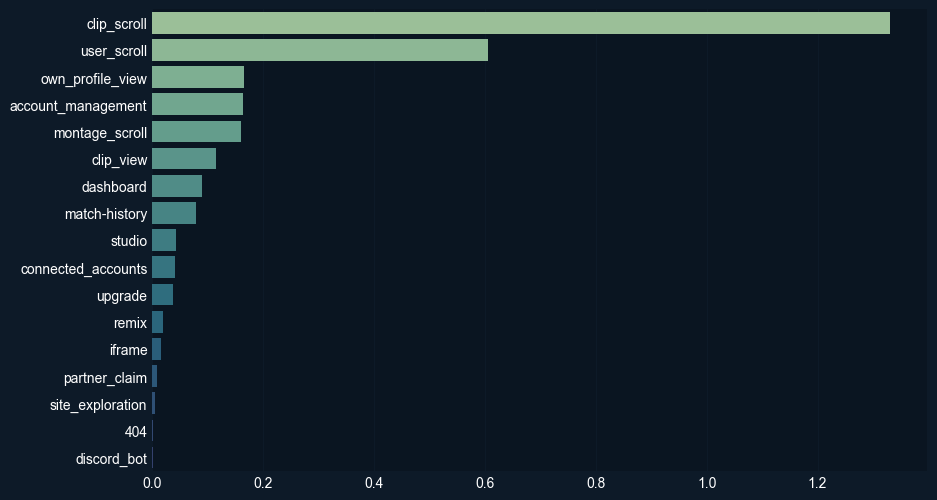

In [6]:
get_user_behavior_barh_chart(equals_1_df, filtered=True, mean=True)